## Envoronment

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import torch
from torch.nn import functional as F
import numpy as np
from icecream import ic
# HuggingFace & Torch
from transformers import AutoTokenizer, T5ForConditionalGeneration 

In [4]:
# Load model
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [61]:
inputs = tokenizer("Hello Hello World.\nAnswer: (A). Very Inaccurate", return_tensors="pt")
choice = tokenizer("(A). Very Inaccurate", return_tensors='pt')
ic(len(choice.input_ids[0,:]))
ic(tokenizer.decode(choice.input_ids[0]))

# inputs
ic(inputs)
ic(tokenizer.decode(inputs.input_ids[0][-9:-1]))
outputs = model(**inputs, labels=inputs.input_ids)

prediction_logits = outputs.logits
ic(prediction_logits.shape)

ic| len(choice.input_ids[0,:]): 9
ic| tokenizer.decode(choice.input_ids[0]): '(A). Very Inaccurate</s>'
ic| inputs: {'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
             'input_ids': tensor([[ 8774,  8774,  1150,     5, 11801,    10,    41,   188,   137,  4242,
                        86,  6004,   450,   342,     1]])}
ic| tokenizer.decode(inputs.input_ids[0][-9:-1]): '(A). Very Inaccurate'
ic| prediction_logits.shape: torch.Size([1, 15, 32128])


torch.Size([1, 15, 32128])

In [8]:
probs = torch.softmax(prediction_logits, dim=-1)
ic(probs.shape)

ic| probs.shape: torch.Size([1, 15, 32128])


torch.Size([1, 15, 32128])

ic| eg.shape: torch.Size([32128])


Hello Hello World.
Answer: (A). Very Inaccurate


ic| idx: tensor(32099)
ic| tokenizer.decode([idx]): '<extra_id_0>'


'<extra_id_0>'

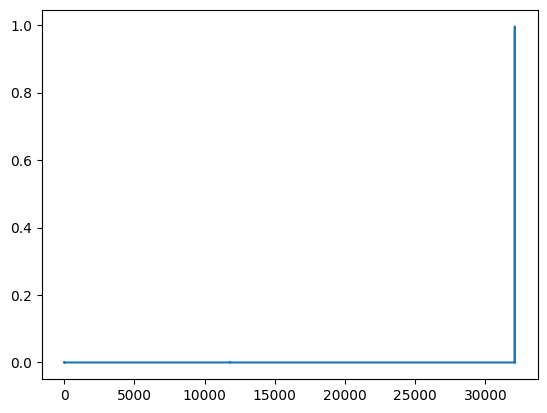

In [9]:
from matplotlib import pyplot as plt
print("Hello Hello World.\nAnswer: (A). Very Inaccurate")
eg = probs[0][0]
ic(eg.shape)
plt.plot(np.arange(len(eg)), eg.detach().cpu())

idx = torch.argmax(eg)
ic(idx)
ic(tokenizer.decode([idx]))

## BART on MPI

In [ ]:
MODEL

{'BERT': transformers.models.bert.modeling_bert.BertLMHeadModel,
 'RoBERTa': transformers.models.roberta.modeling_roberta.RobertaForCausalLM,
 'ALBERT': transformers.models.albert.modeling_albert.AlbertForPreTraining,
 'SpanBERT': None,
 'GPT': transformers.models.openai.modeling_openai.OpenAIGPTLMHeadModel,
 'GPT2': transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel,
 'BART': transformers.models.bart.modeling_bart.BartForConditionalGeneration}

In [34]:
%cd ../..

/Users/morris/Desktop/LLM-Personality-Codebase


In [48]:
from Model.language_model import *
from Model.template import *
from transformers import AutoTokenizer, T5ForConditionalGeneration
from util.utils import ordered_lst_to_str

version = 'T5'
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")#, pad_token_id=tokenizer.eos_token_id)

In [65]:
with torch.no_grad():
    # Text completion
    item = "worry about things"
    eg_q = MPI_TEMPLATE.format(item=item, template='mpi-style') + ordered_lst_to_str(MPI_DESC)
    print(eg_q)
    
    inputs = tokenizer(eg_q, return_tensors='pt')
    input_ids = inputs.input_ids
    
    response = model.generate(input_ids, do_sample=True, top_p=0.95, temperature=0.1,
                                    num_return_sequences=1, early_stopping=True, max_new_tokens=10)

    print(response)
    output = tokenizer.decode(response[0])
print(output)
print(len(response[0]))


Given a statement of you: "You worry about things."
mpi-style
Options: 
Very Accurate 
Moderately Accurate 
Neither Accurate Nor Inaccurate 
Moderately Inaccurate 
Very Inaccurate 

Answers: 
tensor([[    0,     3,  1167,    23,    18,  4084, 17011,    10,  4242,  4292,
          3663]])
<pad> mpi-style Options: Very Accur
11
